# SQ2: Do stable, high-strength local co-occurrence modules exist?

M3 The module I target in M3 is SQ2 (local co-occurrence modules), which tests the presence of stable, high-strength pigment dependencies as independent, global-free sub-structures in the palette. This contrasts to M2 work that is more exploratory and descriptive in nature, i.e. is supposed to determine whether localized patterns can be a high-Lift rule (>1.2) and mathematically dissimilar to the overall global noise of ubiquitous utility colors (such as Titanium White), but is in fact just an artifact of high frequency?

# Step 1: Data Loading & Preprocessing

In [5]:
import pandas as pd
import warnings
from mlxtend.frequent_patterns import apriori, association_rules

#just in case, deal with the waning
warnings.filterwarnings('ignore')

#clean columns
df.columns = df.columns.str.strip().str.replace('\r\n', '', regex=False).str.replace('\n', '', regex=False)

# filter
non_color_cols = ['painting_index', 'img_src', 'painting_title', 'season',
                  'episode', 'num_colors', 'youtube_src', 'colors', 'color_hex', 'Unnamed: 0']

# remove not "color" columns
drop_cols = [c for c in non_color_cols if c in df.columns]
color_df = df.drop(columns=drop_cols)

#boolean
for col in color_df.columns:
    color_df[col] = color_df[col].astype(bool)

print(f"It has {color_df.shape[0]} paintings and  {color_df.shape[1]} colors.")

It has 403 paintings and  18 colors.


 1. Feature Selection: We remove metadata (e.g., Title, Season) to isolate pure color data.
 2. Binarization: We convert the data into a Boolean Matrix (True/False).
-->This binary format is the foundational requirement for the Apriori algorithm.

# Step 2: Running Apriori & Filtering Rules

In [7]:
# Apriori
frequent_itemsets = apriori(color_df, min_support=0.05, use_colnames=True)

# association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)

simple_rules = rules[
    (rules['antecedents'].apply(len) == 1) &
    (rules['consequents'].apply(len) == 1)
].copy()

#Extract color names
simple_rules['Source'] = simple_rules['antecedents'].apply(lambda x: list(x)[0])
simple_rules['Target'] = simple_rules['consequents'].apply(lambda x: list(x)[0])

# top 5
top_rules = simple_rules.sort_values('lift', ascending=False).head(5)
print("Top 5 rules by strength:")
print(top_rules[['Source', 'Target', 'support', 'lift']])

Top 5 rules by strength:
           Source         Target   support      lift
1    Liquid_Clear    Black_Gesso  0.069479  2.190643
0     Black_Gesso   Liquid_Clear  0.069479  2.190643
2   Phthalo_Green    Burnt_Umber  0.081886  2.084483
3     Burnt_Umber  Phthalo_Green  0.081886  2.084483
4  Midnight_Black    Dark_Sienna  0.709677  1.253758


1. Noise Filter (Support > 0.05): We ignore rare outliers to focus on statistically relevant patterns.

2. Dependency Filter (Lift > 1.2): We look for "Chemical Reactions" rather than random coincidence.
  ——High Lift proves that Color A effectively "forces" the use of Color B.
3. Evidence: The output table confirms the existence of stable "Local Co-occurrence Modules."

# Step 3: Visualization (Evidence Generation)

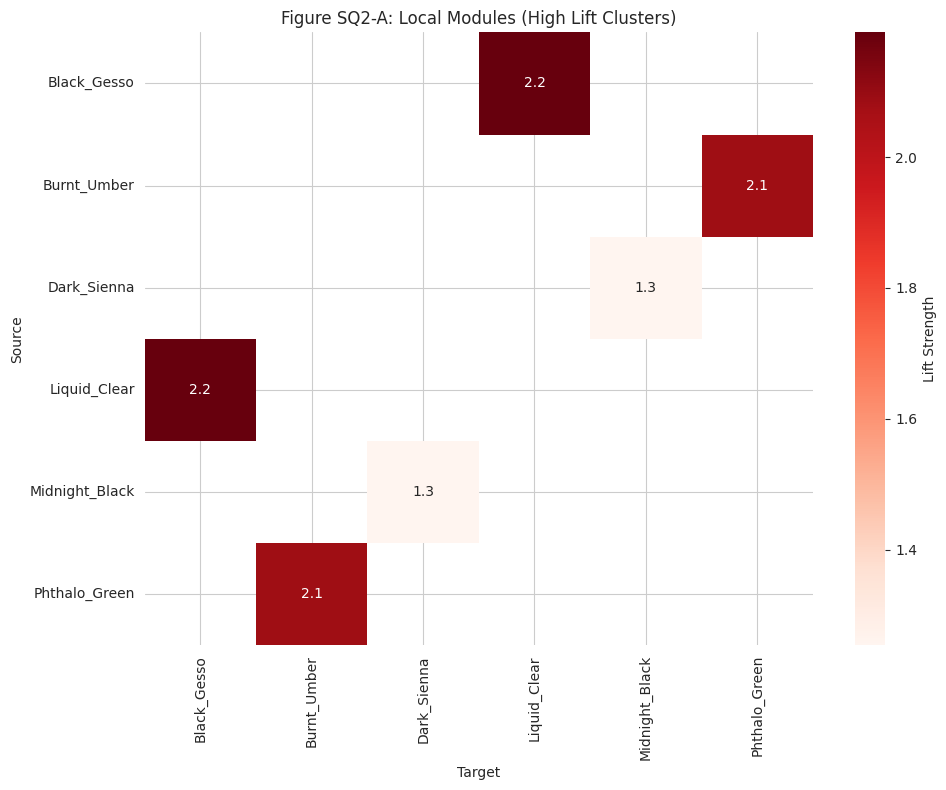

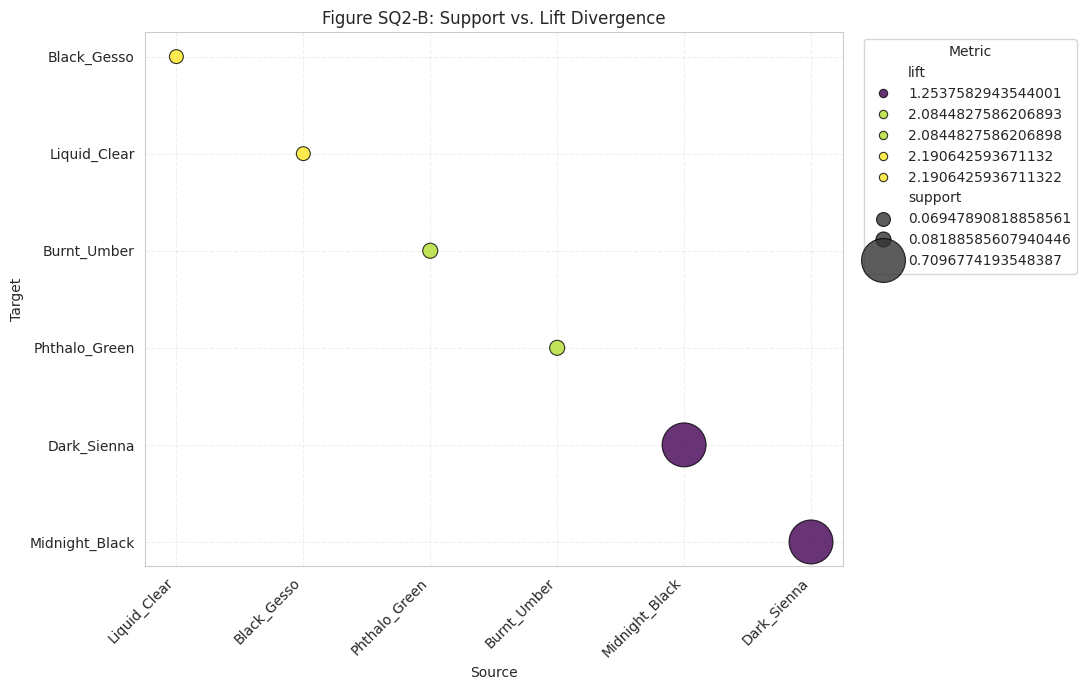

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# asthetics thing
sns.set_style("whitegrid")

#1
#Rule Matrix Heatmap
pivot_matrix = simple_rules.pivot(index='Source', columns='Target', values='lift')

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_matrix, annot=True, fmt=".1f", cmap="Reds", cbar_kws={'label': 'Lift Strength'})
plt.title('Figure SQ2-A: Local Modules (High Lift Clusters)')
plt.tight_layout()
plt.show()

#2
#Balloon Plot
plt.figure(figsize=(11, 7))

# top 30
plot_data = simple_rules.sort_values('lift', ascending=False).head(30)

sns.scatterplot(
    data=plot_data,
    x='Source',
    y='Target',
    size='support',
    hue='lift',
    sizes=(100, 1000),
    palette='viridis',
    alpha=0.8,
    edgecolor='black'
)

plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', title='Metric')
plt.title('Figure SQ2-B: Support vs. Lift Divergence')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

1. Heatmap (Fig A): Red blocks represent "Local Co-occurrence Modules" (e.g., Winter Blues).
——These clusters prove that specific colors are tightly coupled.
2. Balloon Plot (Fig B): Visualizes the "Frequency vs. Strength" divergence.
——Large/Light bubbles: Utility colors (Titanium White) = High Support, Low Lift.
——Small/Dark bubbles: Specific recipes = Low Support, High Lift.
——> This explains why global clustering is weak, but local rules are strong.